# Ice Cream Production Analysis

In [3]:
# %pip install statsmodels

     ---------------------------------------- 9.2/9.2 MB 6.9 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 KB 7.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [153]:
import pandas as pd
# import datetime
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from time import time
import matplotlib.pyplot as plt
from datetime import timedelta
import numpy as np


register_matplotlib_converters()

In [101]:
def parser(s):
    return pd.datetime.strptime(s, '%Y-%m-%d')

In [102]:
data = pd.read_csv('ice cream production.csv', parse_dates=[0],index_col = 0,  squeeze=True, date_parser=parser)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_28628/1275219866.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime.strptime(s, '%Y-%m-%d')


In [103]:
data

DATE
1972-01-01     60.1527
1972-02-01     67.2736
1972-03-01     74.4710
1972-04-01     78.3605
1972-05-01     85.0332
                ...   
2021-02-01    101.2105
2021-03-01    111.4117
2021-04-01    110.6197
2021-05-01    109.4956
2021-06-01    113.1602
Name: IPN31152N, Length: 594, dtype: float64

In [104]:
data.shape

(594,)

In [105]:
# data.info()

In [106]:
# data.rename(columns = {'IPN31152N':'Quantity'}, inplace = True)

In [107]:
data.describe()

count    594.000000
mean     109.926441
std       27.697580
min       58.846300
25%       89.166900
50%      107.717950
75%      127.694100
max      196.819900
Name: IPN31152N, dtype: float64

In [108]:
data.asfreq(pd.infer_freq(data.index))

DATE
1972-01-01     60.1527
1972-02-01     67.2736
1972-03-01     74.4710
1972-04-01     78.3605
1972-05-01     85.0332
                ...   
2021-02-01    101.2105
2021-03-01    111.4117
2021-04-01    110.6197
2021-05-01    109.4956
2021-06-01    113.1602
Freq: MS, Name: IPN31152N, Length: 594, dtype: float64

Text(0, 0.5, 'Production')

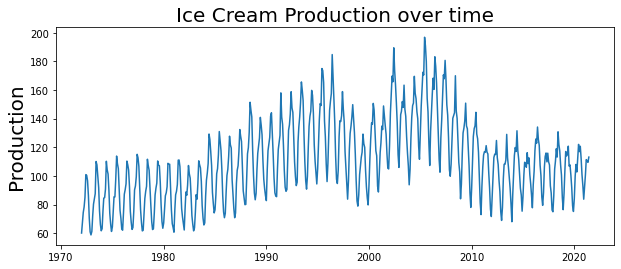

In [109]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.title('Ice Cream Production over time', fontsize =  20)
plt.ylabel('Production', fontsize =  20)


We will cut Short the data from 2000 to 2020

In [110]:
startdate = pd.to_datetime('2000-01-01')
data = data[startdate:]

In [111]:
data

DATE
2000-01-01     93.6509
2000-02-01    111.6605
2000-03-01    125.4901
2000-04-01    137.0016
2000-05-01    136.0743
                ...   
2021-02-01    101.2105
2021-03-01    111.4117
2021-04-01    110.6197
2021-05-01    109.4956
2021-06-01    113.1602
Name: IPN31152N, Length: 258, dtype: float64

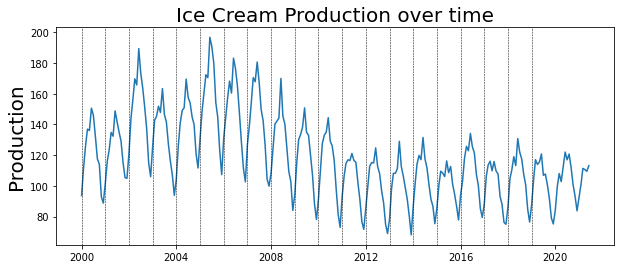

In [112]:
plt.figure(figsize = (10,4))
plt.plot(data)
plt.title('Ice Cream Production over time', fontsize =  20)
plt.ylabel('Production', fontsize =  20)
for year in range(2000, 2020):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--',linewidth=0.5 )


### Some Conclusions

<ul>
<li>The yearly pattern seems Cyclic</li>
<li>The series is not stationary</li>
<li>The sales were decently high in 2000 to 2008 as compared to the most recent data</li>
<li>The series shows a small yet noticable decreasing Trend</li>

<ul>

### Plotting ACF

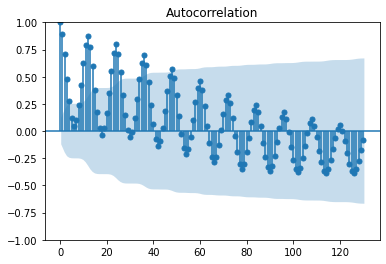

In [113]:
acf_plot = plot_acf(data, lags = 130)

It seems like it is Getting Postive to negative over time

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


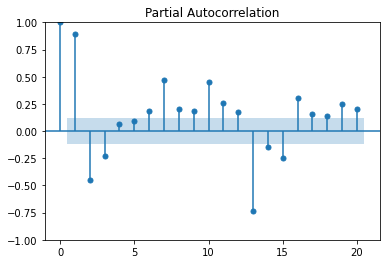

In [114]:
pacf_plot = plot_pacf(data, lags = 20)

The PACF shows strong spikes at first 3 lags, so we should try an AR(3) model"

### Splitting the DAtaset

In [119]:
train_end = pd.to_datetime('2016-01-01')
valid_end = pd.to_datetime('2020-01-01')

In [141]:
train_data = data[:train_end]
valid_data = data[train_end+ timedelta(days = 1):valid_end]

In [142]:
valid_data

DATE
2016-02-01    103.2802
2016-03-01    117.6911
2016-04-01    125.7629
2016-05-01    122.8934
2016-06-01    134.1461
2016-07-01    125.5020
2016-08-01    121.4044
2016-09-01    107.5296
2016-10-01    100.3291
2016-11-01     85.2567
2016-12-01     79.4748
2017-01-01     88.3995
2017-02-01    106.3118
2017-03-01    113.5985
2017-04-01    116.0346
2017-05-01    109.8382
2017-06-01    115.8969
2017-07-01    109.7930
2017-08-01    107.6946
2017-09-01     93.1538
2017-10-01     88.1042
2017-11-01     76.1651
2017-12-01     75.0098
2018-01-01     86.3635
2018-02-01    104.8826
2018-03-01    110.2793
2018-04-01    119.0028
2018-05-01    113.1868
2018-06-01    130.8140
2018-07-01    122.0043
2018-08-01    117.4884
2018-09-01    107.5606
2018-10-01    100.6902
2018-11-01     84.7957
2018-12-01     76.4424
2019-01-01     87.8427
2019-02-01    104.3388
2019-03-01    117.0738
2019-04-01    113.9729
2019-05-01    115.5232
2019-06-01    120.7968
2019-07-01    106.8955
2019-08-01    107.7196
2019-0

# Fitting the AR model

In [180]:
model = AutoReg(train_data, lags= 20)

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [181]:
start = time()
fitted_model = model.fit()
end = time()
print('Model Training Time', end-start)

Model Training Time 0.003000974655151367


In [182]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              IPN31152N   No. Observations:                  193
Model:                    AutoReg(20)   Log Likelihood                -530.209
Method:               Conditional MLE   S.D. of innovations              5.185
Date:                Mon, 09 Jan 2023   AIC                           1104.418
Time:                        20:48:53   BIC                           1173.791
Sample:                    09-01-2001   HQIC                          1132.562
                         - 01-01-2016                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9435      2.786      0.698      0.485      -3.517       7.404
IPN31152N.L1      0.8484      0.076     11.234      0.000       0.700       0.996
IPN31152N.L2     -0.0010      0.099     -0.011      0.992      -0.195       0.193
IPN31152N.L3      0.1992      0.099      2.006      0.045       0.005       0.394
IPN31152N.L4     -0.1276      0.100     -1.276      0.202      -0.324       0.068
IPN31152N.L5      0.1668      0.099      1.679      0.093      -0.028       0.362
IPN31152N.L6     -0.1914      0.096     -1.994      0.046      -0.380      -0.003
IPN31152N.L7      0.0337      0.097      0.348      0.728      -0.156       0.223
IPN31152N.L8     -0.0084      0.084     -0.100      0.920      -0.173       0.156
IPN31152N.L9     -0.1136      0.065     -1.758      0.079      -0.240       0.013
IPN31152N.L10     0.0394      0.064      0.611      0.541      -0.087       0.166
IPN31152N.L11     0.1225      0.063      1.930      0.054      -0.002       0.247
IPN31152N.L12     0.6821      0.063     10.783      0.000       0.558       0.806
IPN31152N.L13    -0.6451      0.082     -7.915      0.000      -0.805      -0.485
IPN31152N.L14     0.0822      0.095      0.867      0.386      -0.104       0.268
IPN31152N.L15    -0.3600      0.095     -3.800      0.000      -0.546      -0.174
IPN31152N.L16     0.1737      0.098      1.764      0.078      -0.019       0.367
IPN31152N.L17    -0.0530      0.099     -0.536      0.592      -0.247       0.141
IPN31152N.L18    -0.0010      0.097     -0.011      0.991      -0.192       0.190
IPN31152N.L19     0.0502      0.097      0.517      0.605      -0.140       0.241
IPN31152N.L20     0.0863      0.075      1.150      0.250      -0.061       0.234
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             0.8674           -0.5025j            1.0025           -0.0836
AR.2             0.8674           +0.5025j            1.0025            0.0836
AR.3             1.0102           -0.0000j            1.0102           -0.0000
AR.4             1.0613           -0.1832j            1.0770           -0.0272
AR.5             1.0613           +0.1832j            1.0770            0.0272
AR.6             0.5082           -0.8768j            1.0134           -0.1664
AR.7             0.5082           +0.8768j            1.0134            0.1664
AR.8             0.0052           -1.0128j            1.0128           -0.2492
AR.9             0.0052           +1.0128j            1.0128            0.2492
AR.10            0.6097           -1.2146j            1.3590           -0.1760
AR.11            0.6097           +1.2146j            1.3590            0.1760
AR.12           -1.0192           -0.0000j            1.0192           -0.5000
AR.13    

Conclusions

Lag 3 is not much important since it has a p_value far above 0.5 hence, it could be omitted while traing the Ar(3), offcourse, if we decide to train it.

#### Predicting values on the valid,data

In [183]:
predictions = fitted_model.predict(start = valid_data.index[0], end = valid_data.index[-1])
residuals = valid_data-predictions

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [184]:
residuals

DATE
2016-02-01    -3.071779
2016-03-01     1.977834
2016-04-01     9.158749
2016-05-01     9.153886
2016-06-01    11.768833
2016-07-01     9.053436
2016-08-01     3.505916
2016-09-01     1.330836
2016-10-01    -0.057730
2016-11-01    -6.394782
2016-12-01    -4.600597
2017-01-01    -9.460378
2017-02-01    -1.497654
2017-03-01    -4.007545
2017-04-01    -1.930152
2017-05-01    -5.330080
2017-06-01    -6.555965
2017-07-01    -6.526930
2017-08-01    -8.646585
2017-09-01   -12.178614
2017-10-01   -11.545473
2017-11-01   -15.302040
2017-12-01   -10.471514
2018-01-01   -11.078387
2018-02-01    -1.706155
2018-03-01    -6.714134
2018-04-01     1.582549
2018-05-01    -2.583651
2018-06-01     8.786089
2018-07-01     5.806023
2018-08-01     1.682739
2018-09-01     2.149482
2018-10-01     0.537317
2018-11-01    -8.145583
2018-12-01   -11.684051
2019-01-01   -10.852434
2019-02-01    -3.028577
2019-03-01    -0.722536
2019-04-01    -4.418156
2019-05-01    -2.136995
2019-06-01    -1.830571
2019-07-01 

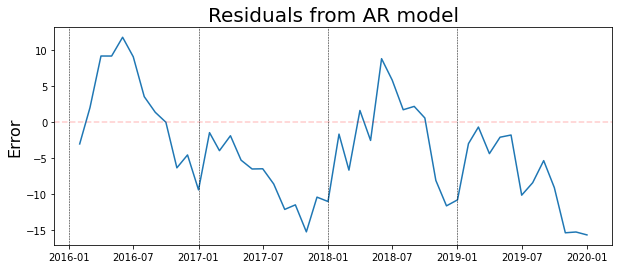

In [185]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR model', fontsize =20)
plt.ylabel('Error', fontsize = 16)
plt.axhline(0, color = 'r', linestyle = '--', alpha = 0.2)

for year in range(2016, 2020):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', linewidth = 0.5)

#### Predictions Vs Actual Data

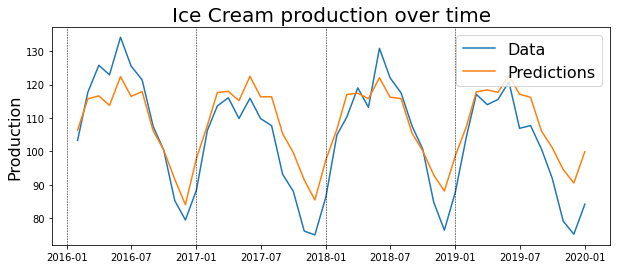

In [186]:
plt.figure(figsize=(10,4))

plt.plot(valid_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize= 16)

plt.title('Ice Cream production over time', fontsize = 20)
plt.ylabel('Production', fontsize = 16)

for year in range(2016, 2020):
    plt.axvline(pd.to_datetime(str(year) +'-01-01'), color = 'k', linestyle = '--', linewidth = 0.5)


As you can see, the model is not that bad in the beginning but as soon as you go longer and longer the accuracy of the model is fading

In [187]:
print('Mean Absoulute Percent Error', round(np.mean(abs(residuals/valid_data)),4))

Mean Absoulute Percent Error 0.0695


In [188]:
print('Root Mean Squared  Error', np.sqrt(np.mean(residuals**2)))

Root Mean Squared  Error 7.995026061406057


We performed all this on an AR(3) model now, we will try differnt models to check which is better. (Re-runnig the above, by changing the values)

#### Hence we built a strong model which could predict good outcomes using the Ice cream Procduction Dataset